<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf4_vintage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/me.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/noise.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/frame.jpg

--2024-12-06 16:38:59--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186400 (182K) [image/jpeg]
Saving to: ‘me.jpg’

me.jpg              100%[===================>] 182.03K  1.16MB/s    in 0.2s    

2024-12-06 16:38:59 (1.16 MB/s) - ‘me.jpg’ saved [186400/186400]

--2024-12-06 16:38:59--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129746 (127K) [image/jpeg]
Saving to: ‘noi

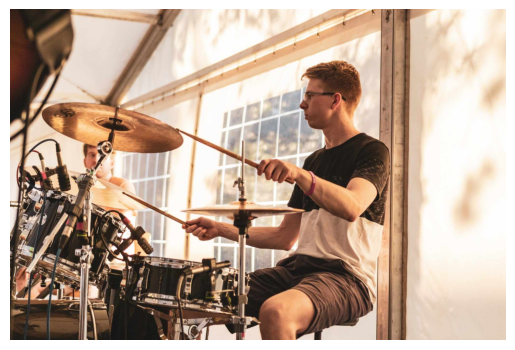

In [3]:
# Kép betöltése
img = cv2.imread('me.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

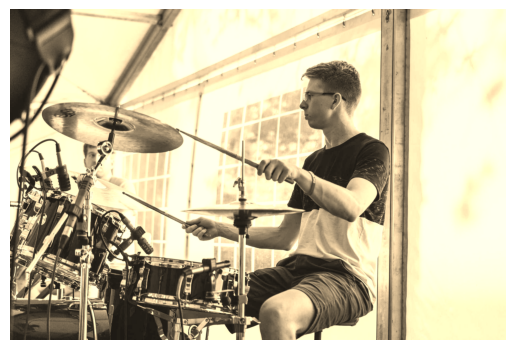

In [4]:
# Képszín transzformáció (forrás: https://yabirgb.com/sepia_filter/)
sepia_filter = np.array([[0.393, 0.796, 0.189],
                         [0.349, 0.686, 0.168],
                         [0.272, 0.534, 0.131]])

sepia_img = cv2.transform(img, sepia_filter)

# Pixelek min és max intenzitásértéke 0 és 255, illetve konvertálunk, hogy ne legyen float értékünk
sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

plt.axis('off')
plt.imshow(sepia_img)

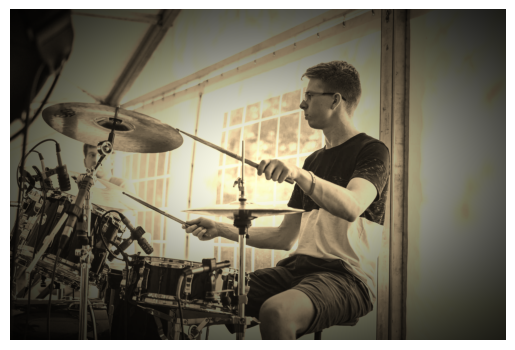

In [5]:
# Vignettálás (Gauss-kernel alapján, forrás: https://dev.to/ethand91/creating-more-filters-with-opencv-and-python-3bhh)
level = 3
height, width = img.shape[:2]

X_resultant_kernel = cv2.getGaussianKernel(width, width/level)
Y_resultant_kernel = cv2.getGaussianKernel(height, height/level)

kernel = Y_resultant_kernel * X_resultant_kernel.T
kernel = kernel / kernel.max()

vignette_img = np.copy(sepia_img)

for i in range(3):
    vignette_img[:, :, i] = vignette_img[:, :, i] * kernel

plt.axis('off')
plt.imshow(vignette_img)

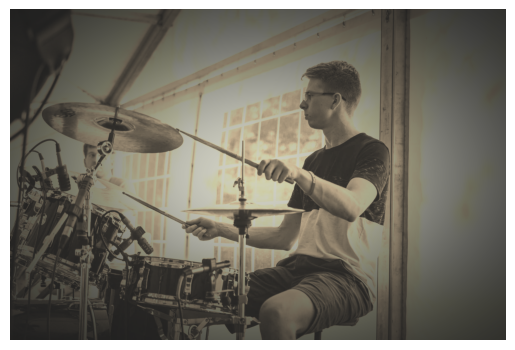

In [6]:
# Kontraszt gyengítése + világosítás
contrast_img = cv2.convertScaleAbs(vignette_img, alpha=0.7, beta=30)

plt.axis('off')
plt.imshow(contrast_img)

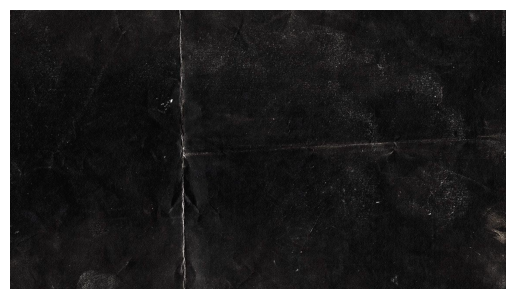

In [7]:
# Zaj (folt, hajtás, szakadás) hozzáadása
noise = cv2.imread('noise.jpg') # Szürkeárnyalatos, így mindegy, hogy BGR vagy RGB

plt.axis('off')
plt.imshow(noise)

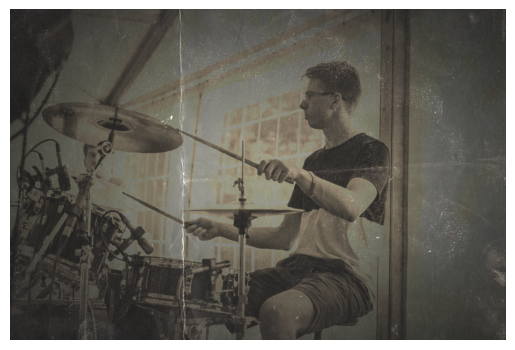

In [8]:
# Zaj átméretezése
noise = cv2.resize(noise, (contrast_img.shape[1], contrast_img.shape[0]))

# Zaj és kép összeadása
# noisy_img = cv2.add(contrast_img, noise) # Ez a módszer szerintem kevésbé szép eredményt ad
noisy_img = cv2.addWeighted(contrast_img, 0.7, noise, 0.6, 0)

plt.axis('off')
plt.imshow(noisy_img)

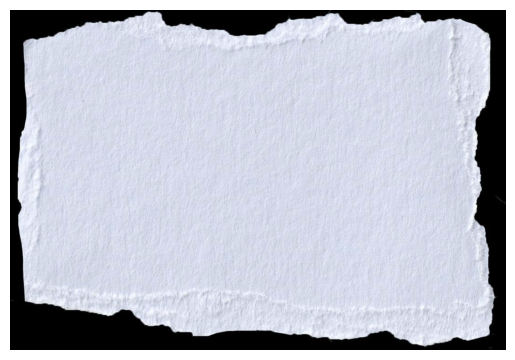

In [9]:
# Képkeret
frame = cv2.imread('frame.jpg')

plt.axis('off')
plt.imshow(frame)

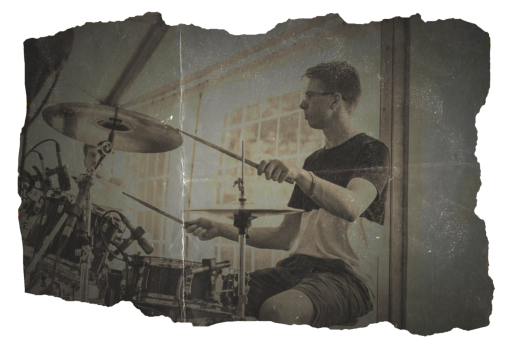

In [10]:
# frame átméretezése
frame = cv2.resize(frame, (noisy_img.shape[1], noisy_img.shape[0]))

# frame binarizálása és invertálása
_, frame = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY_INV)

# frame hozzáadása a képhez
frame_img = cv2.add(noisy_img, frame)

plt.axis('off')
plt.imshow(frame_img)